In [1]:
#importing libraries

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
#loading data

data=pd.read_excel(r"C:\Users\anoop\Dropbox\PC\Downloads\iris (1).xls")

In [3]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [4]:
#shape of the data

data.shape

(150, 5)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
#checking for null values

data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [7]:
#filling missing values

for i in ['SL', 'SW','PL']:
    data[i]=data[i].fillna(data[i].median())

In [8]:
data.isna().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

In [9]:
#label  encoding in classification column

from sklearn.preprocessing import LabelEncoder
label_encoder=LabelEncoder()
data['Classification']=label_encoder.fit_transform(data['Classification'])

In [10]:
data.head()

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,5.8,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<AxesSubplot:>

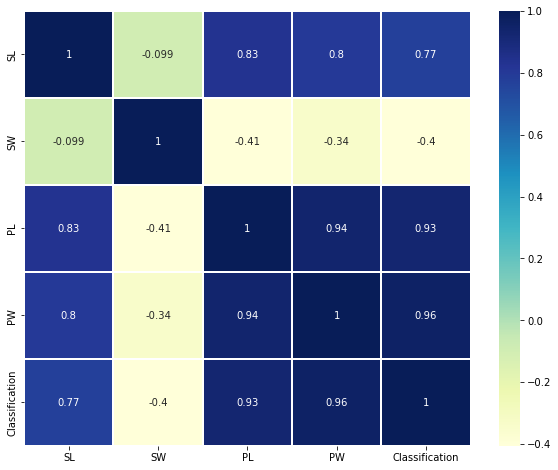

In [130]:
#correlation matrix

corrmatrix=data.corr()
plt.subplots(figsize=(10,8))
sns.heatmap(corrmatrix,linewidth=0.2,annot=True,cmap='YlGnBu')

In [12]:
#datas into feature and target

y=data['Classification']
x=data.drop('Classification',axis=1)

In [13]:
#train test split

from sklearn.model_selection import train_test_split

In [96]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42,test_size=0.20)

# logistic regression model

In [97]:
from sklearn.linear_model import LogisticRegression

In [98]:
logit_model=LogisticRegression()
logit_model=logit_model.fit(x_train,y_train)
y_pred_logit=logit_model.predict(x_test)

C:\Users\anoop\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [99]:
from sklearn.metrics import confusion_matrix, accuracy_score

In [100]:
confusion_matrix(y_test,y_pred_logit)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [101]:
accuracy_score(y_test,y_pred_logit)

1.0

# KNN model

In [102]:
from sklearn.neighbors import KNeighborsClassifier

In [103]:
metric_k=[]
neighbors=range(3,15)

for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(x_train,y_train)
    y_pred_KNN=classifier.predict(x_test)
    acc=accuracy_score(y_test,y_pred_KNN)
    metric_k.append(acc)

In [104]:
metric_k

[0.9666666666666667,
 1.0,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 0.9666666666666667,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

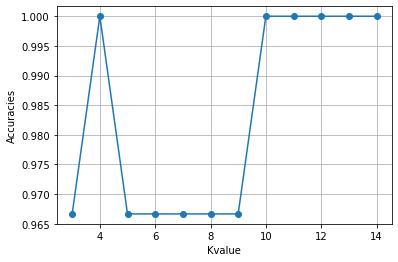

In [105]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('Kvalue')
plt.ylabel('Accuracies')
plt.grid()

In [127]:
classifier=KNeighborsClassifier(n_neighbors=4)
classifier=classifier.fit(x_train,y_train)
y_pred_KNN=classifier.predict(x_test)

In [128]:
accuracy_score(y_test,y_pred_KNN)

1.0

In [129]:
confusion_matrix(y_test,y_pred_KNN)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

# SVM model

In [109]:
from sklearn.svm import SVC

In [110]:
#linear kernel

svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(x_train,y_train)
y_pred_svm=svm_clf.predict(x_test)

In [111]:
confusion_matrix(y_test,y_pred_svm)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [112]:
accuracy_score(y_test,y_pred_svm)

1.0

In [113]:
#rbf kernel

svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(x_train,y_train)
y_pred_svm2=svm_clf2.predict(x_test)

In [114]:
confusion_matrix(y_test,y_pred_svm2)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [115]:
accuracy_score(y_test,y_pred_svm2)

1.0

# Decision Tree

In [116]:
from sklearn.tree import DecisionTreeClassifier

In [117]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(x_train,y_train)
y_pred_dt=dt_clf.predict(x_test)

In [118]:
confusion_matrix(y_test,y_pred_dt)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [119]:
accuracy_score(y_test,y_pred_dt)

1.0

# Random Forest

In [120]:
from sklearn.ensemble import RandomForestClassifier

In [121]:
rf_clf=RandomForestClassifier()
rf_clf=rf_clf.fit(x_train,y_train)
y_pred_rf=rf_clf.predict(x_test)

In [122]:
confusion_matrix(y_test,y_pred_rf)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [123]:
accuracy_score(y_test,y_pred_rf)

1.0

For the given dataset we got 100% accuracy in all the models. 